# PRACTICAL NO. 2
# Data Wrangling I

Perform the following operations using Python on dataset(e.g., student.csv)
1. Import all the required Python Libraries. And Load the Dataset into pandas data frame.
2. Data Preprocessing: find the missing values in the data and display statistical information.
3. Provide variable descriptions. Types of variables etc. Check the dimensions of the data frame
4. Data Normalization: Perform min max normalization and plot box plot for any column
5. Turn categorical variables for PG column into quantitative variables in Python.

# **1**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('datasets/AcademicPerformance_New.csv')

In [79]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


# **2**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [81]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

### Handling missing values

1. All data

In [82]:
df.dropna(subset=['Roll No'], inplace=True)

2. City

In [83]:
df['WT'] = df['WT'].fillna(df['WT'].median())

3. Gender 

In [84]:
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].median())

4. Salary

In [85]:
df['AI'] = df['AI'].fillna(df['AI'].median())

In [86]:
df.describe()

,Roll No,WT,DSBDA,AI,Average
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,50.479592,61.295918,64.693878,62.306122,58.663265
std,28.469274,14.451632,14.662814,15.447556,16.518482
min,1.000000,18.000000,26.000000,20.000000,26.000000
25%,26.250000,53.000000,55.000000,54.000000,45.250000
50%,50.500000,63.000000,66.000000,63.000000,59.333333
75%,74.750000,71.000000,74.000000,74.000000,71.916667
max,99.000000,97.000000,95.000000,92.000000,91.666667


# **3**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           98 non-null     float64
 3   DSBDA        98 non-null     float64
 4   AI           98 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.9+ KB


In [88]:
df.ndim, df.shape

(2, (98, 8))

# **4**

### Perform normalization on 'Average'

In [89]:
df['Average'] = (df['Average'] - df['Average'].min())/(df['Average'].max() - df['Average'].min())

In [90]:
df['Average'].head()

0    0.710660
1    0.411168
3    0.065990
4    0.385787
5    0.781726
Name: Average, dtype: float64

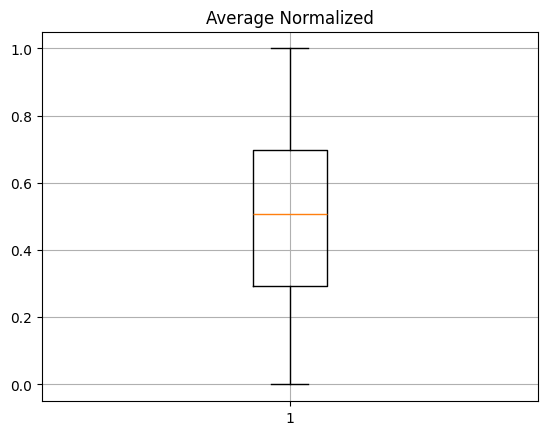

In [91]:
plt.boxplot(df['Average'])
plt.title('Average Normalized')
plt.grid(True)
plt.show()

# **5**

In [92]:
mapping = {'Yes': 1, 'No':0}
df['PG'] = df['PG'].map(mapping)

In [93]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,0.710660,C,1
1,2.0,Japan,69.0,90.0,63.0,0.411168,B,0
3,4.0,China,47.0,66.0,44.0,0.065990,D,1
4,5.0,India,76.0,78.0,63.0,0.385787,C,0
5,6.0,Japan,71.0,83.0,78.0,0.781726,C,1
